# Bài ôn tập buổi 8: Marketing
### Yêu cầu: Áp dụng Simple Linear Regression để dự đoán sales dựa trên youtube
- Cho dữ liệu marketing.csv. Hãy áp dụng Simple Linear Regression để dự đoán dự đoán sales dựa trên youtube
- Đọc dữ liệu và gán cho biến data.
- Xem thông tin data: head(), số dòng, số cột, str, summary
- Tiền xử lý dữ liệu
- Vẽ biểu đồ quan sát mối liên hệ giữa sales và youtube 
- Kiểm tra outliers => loại outliers
- Tạo train:test từ dữ liệu data với tỉ lệ 70:30
- Thực hiện Linenear Regression với train data.
- In summary của model
- Dự đoán y_test_predict từ test data => so sánh với y_test_pred với y_test
- Tính Mean Square Error (mse), r^2 cho train, r^2 cho test. Nhận xét
- Tìm Coefficients, Intercept
- Cho youtube lần lượt: x <- c(100, 200, 300) => dự đoán sales
- Trực quan hóa kết quả

### Yêu cầu bổ sung: Áp dụng Multiple Linear Regression để dự đoán sales dựa trên các thuộc tính (youtube, facebook, newspaper) do HV tự lựa chọn (2, 3 thuộc tính). Nhận xét kết quả so với Simple Linear Regression.


In [1]:
data = read.csv("../Data/marketing.csv")

In [2]:
head(data)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [3]:
str(data)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


In [4]:
summary(data)

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

In [5]:
na.omit(data)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64
7,69.00,39.36,28.20,14.16
8,144.24,23.52,13.92,15.84
9,10.32,2.52,1.20,5.76


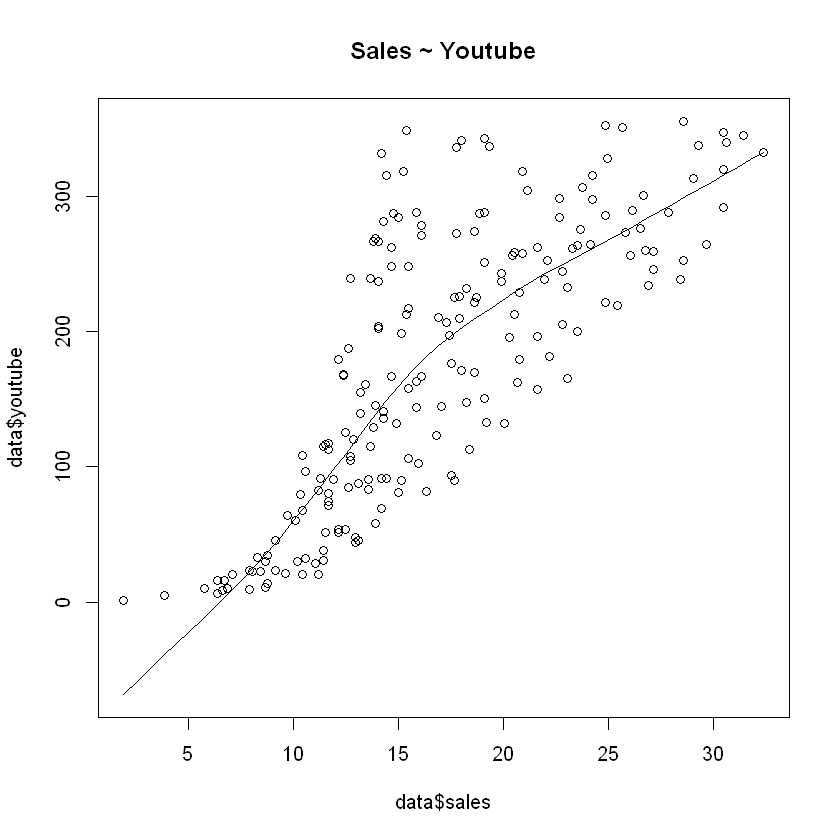

In [6]:
scatter.smooth(x = data$sales, y = data$youtube, main = "Sales ~ Youtube")

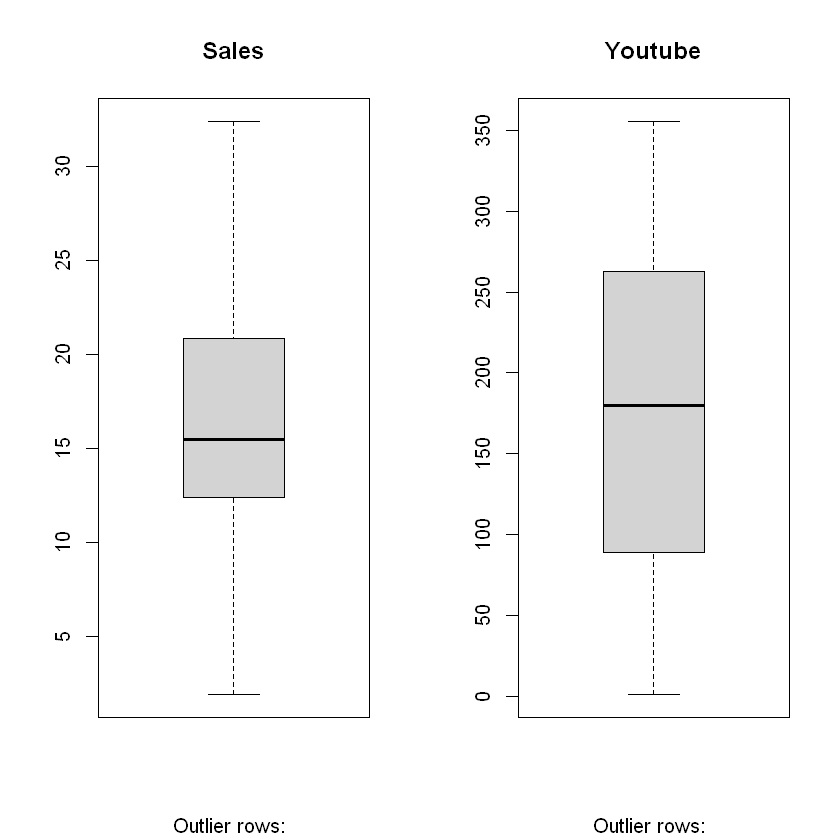

In [7]:
par(mfrow = c(1, 2))
boxplot(data$sales, main = "Sales", 
        sub = paste("Outlier rows:", boxplot.stats(data$sales)$out))
boxplot(data$youtube, main = "Youtube", 
        sub = paste("Outlier rows:", boxplot.stats(data$youtube)$out))

# không có outliers

In [8]:
# Create training and test data samples from orginal data
set.seed(42) # Setting seed to reproduce results of ramdom sampling
trainingRowIndex = sample(1: nrow(data), 0.7 * nrow(data))
print("Selected training row indexes:")
print(trainingRowIndex)
trainingData = data[trainingRowIndex, ]
testData = data[- trainingRowIndex,]
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes:"
  [1]  49  65 153  74 146 122 200 128  47  24  71 100  89 165 110  20 154 114
 [19] 111 131  41 188  27 164 109   5 162  92 104   3  58  42 191 158  43 143
 [37] 150 170 136  36  68 196 176 173   4  99 184 183   6 134 130 116 171 118
 [55]   2 102 138  40 175  33 103 167  73  76   9  35  16 101  69 147 177  82
 [73] 168 113  18 132 186 172  55 187  21 189  57 119 140 169 126  91  13  53
 [91]  54  83  32  80  60  29  81 144  85 166 163  72 105 195  38   1 112  78
[109] 142 149  97 151 133 115  87 181  98  25  63 108  14 152 192  88  62  37
[127]  31  34  79  96 155  15 127  86 106  12  64  26 180  95
[1] "Rows of training data and test data:"
[1] 140
[1] 60


In [9]:
# Develop the model on the training data and use it to preidict the Length on test data
lmMod = lm(sales ~ youtube, data =  trainingData) # Build the model
iPred = predict(lmMod, testData) # predict length

# mean square error according to model
mse = mean(lmMod$residuals^2)
print(paste("mse:", mse))

# mean square error of test data
mse_test = mean((testData$sales - iPred)^2)
print(paste("mse in test:", mse_test))

[1] "mse: 14.3404725926901"
[1] "mse in test: 17.017194022147"


In [10]:
# Review dianostic measures
print(summary(lmMod))


Call:
lm(formula = sales ~ youtube, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5217 -2.4725 -0.1652  2.5124  8.2946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.52760    0.66735   12.78   <2e-16 ***
youtube      0.04688    0.00315   14.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.814 on 138 degrees of freedom
Multiple R-squared:  0.6161,	Adjusted R-squared:  0.6134 
F-statistic: 221.5 on 1 and 138 DF,  p-value: < 2.2e-16



In [11]:
x = c(50, 100, 200)
y = predict(lmMod, data.frame(youtube = x))
print("results:")
print(y)

[1] "results:"
       1        2        3 
10.87167 13.21575 17.90389 


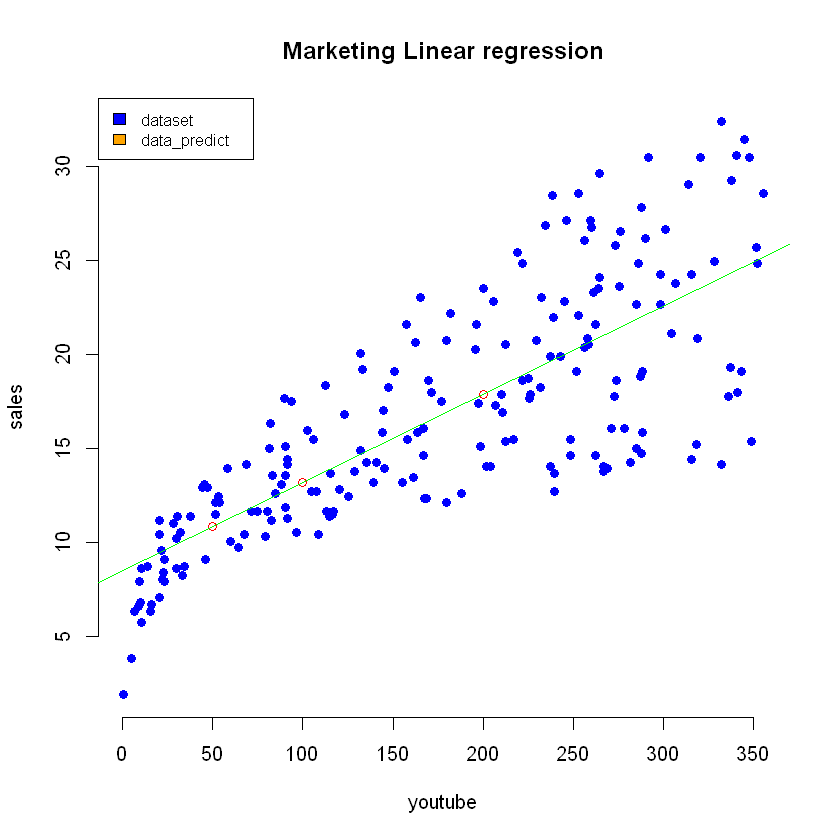

In [12]:
# Visualization
plot(data$youtube, data$sales,
     main = "Marketing Linear regression",
     xlab = "youtube", ylab = "sales",
     pch = 19, frame = FALSE, col = 'blue')
lines(x, y, col = 'red', type = 'p')
abline(lmMod, baseball, col = 'green')
legend("topleft", c("dataset", "data_predict"), cex = 0.8, fill = c("blue", "orange"))